# Computations and Figures for a Department of Statistics Colloquim at Purdue University
presented on Friday, March 3, 2023

### Import the necessary packages and set up plotting routines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qmcpy as qp
import time  #timing routines
import warnings  #to suppress warnings when needed
import pickle  #write output to a file and load it back in
from copy import deepcopy

plt.rc('font', size=16)  #set defaults so that the plots are readable
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=16)

#a helpful plotting method to show increasing numbers of points
def plot_successive_points(distrib,ld_name,first_n=64,n_cols=1,
                           pt_clr=['tab:blue', 'tab:green', 'k', 'tab:cyan', 'tab:purple', 'tab:orange'],
                           xlim=[0,1],ylim=[0,1]):
  fig,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(5*n_cols,5.5))
  if n_cols==1: ax = [ax]
  last_n = first_n*(2**n_cols)
  points = distrib.gen_samples(n=last_n)
  for i in range(n_cols):
    n = first_n
    nstart = 0
    for j in range(i+1):
      n = first_n*(2**j)
      ax[i].scatter(points[nstart:n,0],points[nstart:n,1],color=pt_clr[j])
      nstart = n
    ax[i].set_title('n = %d'%n)
    ax[i].set_xlim(xlim); ax[i].set_xticks(xlim); ax[i].set_xlabel('$x_{i,1}$')
    ax[i].set_ylim(ylim); ax[i].set_yticks(ylim); ax[i].set_ylabel('$x_{i,2}$')
    ax[i].set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
  fig.suptitle('%s Points'%ld_name, y=0.87)
  return fig

print('QMCPy Version',qp.__version__)

QMCPy Version 1.3.2


### Set the path to save the figures here

In [2]:
figpath = '/Users/fredhickernell/SoftwareRepositories/Purdue-2023-March-Talk/figures/' #this path sends the figures to my directory

## Here are some plots of IID and Low Discrepancy (LD) Points
### Lattice points first

[[0.35231824 0.2645238  0.31824712 0.50738821 0.1543829 ]
 [0.85231824 0.7645238  0.81824712 0.00738821 0.6543829 ]
 [0.60231824 0.0145238  0.06824712 0.75738821 0.4043829 ]
 [0.10231824 0.5145238  0.56824712 0.25738821 0.9043829 ]
 [0.47731824 0.6395238  0.69324712 0.63238821 0.2793829 ]
 [0.97731824 0.1395238  0.19324712 0.13238821 0.7793829 ]
 [0.72731824 0.3895238  0.44324712 0.88238821 0.5293829 ]
 [0.22731824 0.8895238  0.94324712 0.38238821 0.0293829 ]
 [0.41481824 0.9520238  0.50574712 0.56988821 0.7168829 ]
 [0.91481824 0.4520238  0.00574712 0.06988821 0.2168829 ]
 [0.66481824 0.7020238  0.25574712 0.81988821 0.9668829 ]
 [0.16481824 0.2020238  0.75574712 0.31988821 0.4668829 ]
 [0.53981824 0.3270238  0.88074712 0.69488821 0.8418829 ]
 [0.03981824 0.8270238  0.38074712 0.19488821 0.3418829 ]
 [0.78981824 0.0770238  0.63074712 0.94488821 0.0918829 ]
 [0.28981824 0.5770238  0.13074712 0.44488821 0.5918829 ]]


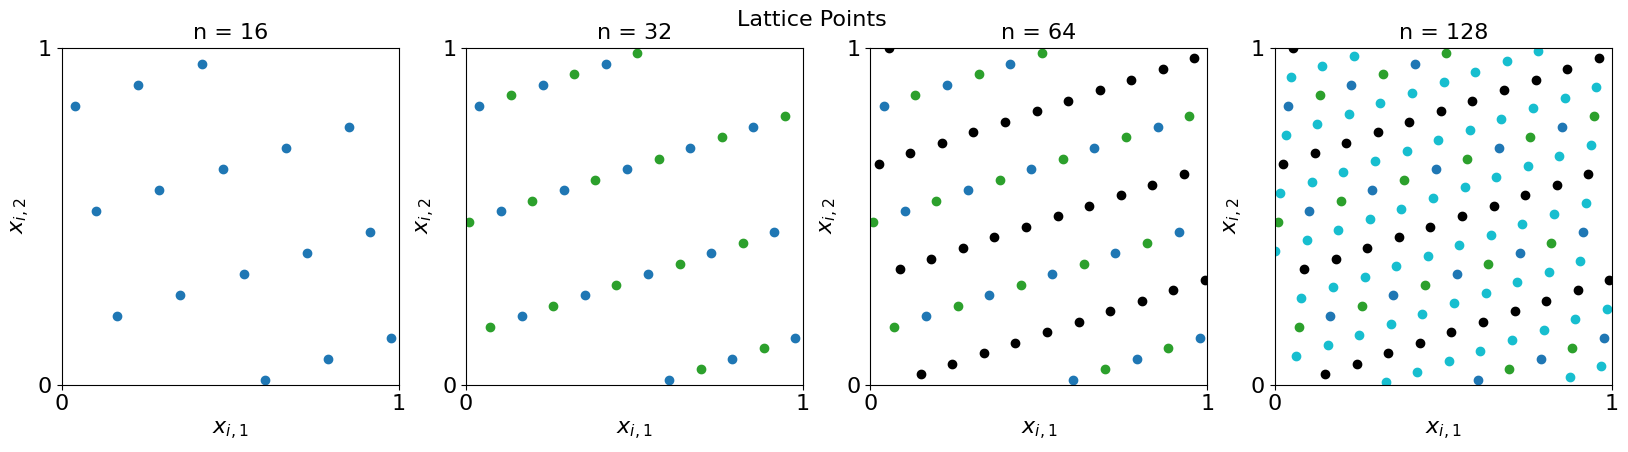

In [20]:
d = 5 #dimension
n = 16 #number of points
ld = qp.Lattice(d) #define the generator
xpts = ld.gen_samples(n) #generate points
print(xpts)
fig = plot_successive_points(ld,'Lattice',first_n=n,n_cols=4)
fig.savefig(figpath+'latticepts.eps',format='eps')

### Next Sobol' points

[[], []]
[array([[0.92439049, 0.919817  , 0.77655502, 0.11696267, 0.31582224],
       [0.42439049, 0.419817  , 0.27655502, 0.61696267, 0.81582224],
       [0.17439049, 0.669817  , 0.52655502, 0.36696267, 0.56582224],
       [0.67439049, 0.169817  , 0.02655502, 0.86696267, 0.06582224],
       [0.04939049, 0.294817  , 0.15155502, 0.24196267, 0.44082224],
       [0.54939049, 0.794817  , 0.65155502, 0.74196267, 0.94082224],
       [0.29939049, 0.044817  , 0.90155502, 0.49196267, 0.69082224],
       [0.79939049, 0.544817  , 0.40155502, 0.99196267, 0.19082224],
       [0.98689049, 0.607317  , 0.96405502, 0.17946267, 0.87832224],
       [0.48689049, 0.107317  , 0.46405502, 0.67946267, 0.37832224],
       [0.23689049, 0.357317  , 0.71405502, 0.42946267, 0.12832224],
       [0.73689049, 0.857317  , 0.21405502, 0.92946267, 0.62832224],
       [0.11189049, 0.982317  , 0.33905502, 0.30446267, 0.00332224],
       [0.61189049, 0.482317  , 0.83905502, 0.80446267, 0.50332224],
       [0.36189049, 0.73

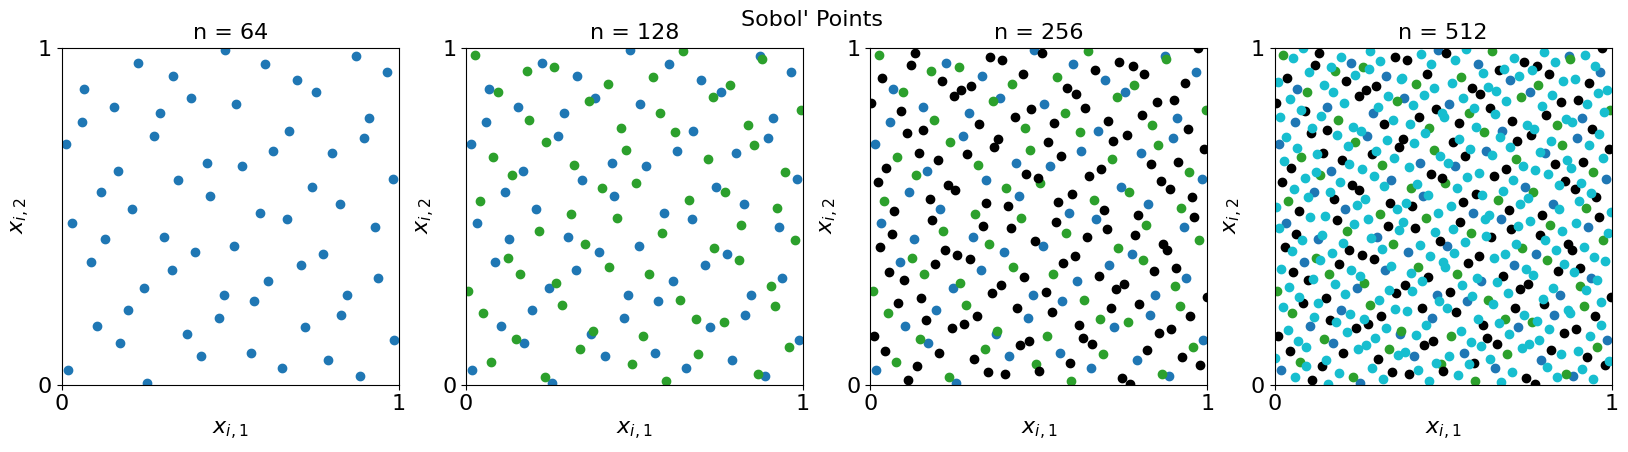

In [13]:
ld = qp.Sobol(d) #define the generator
xpts_Sobol = ld.gen_samples(n) #generate points
fig = plot_successive_points(ld,'Sobol\'',first_n=n,n_cols=4)
fig.savefig(figpath+'sobolpts.eps',format='eps')

### Compare to IID

Note that there are more gaps and clusters

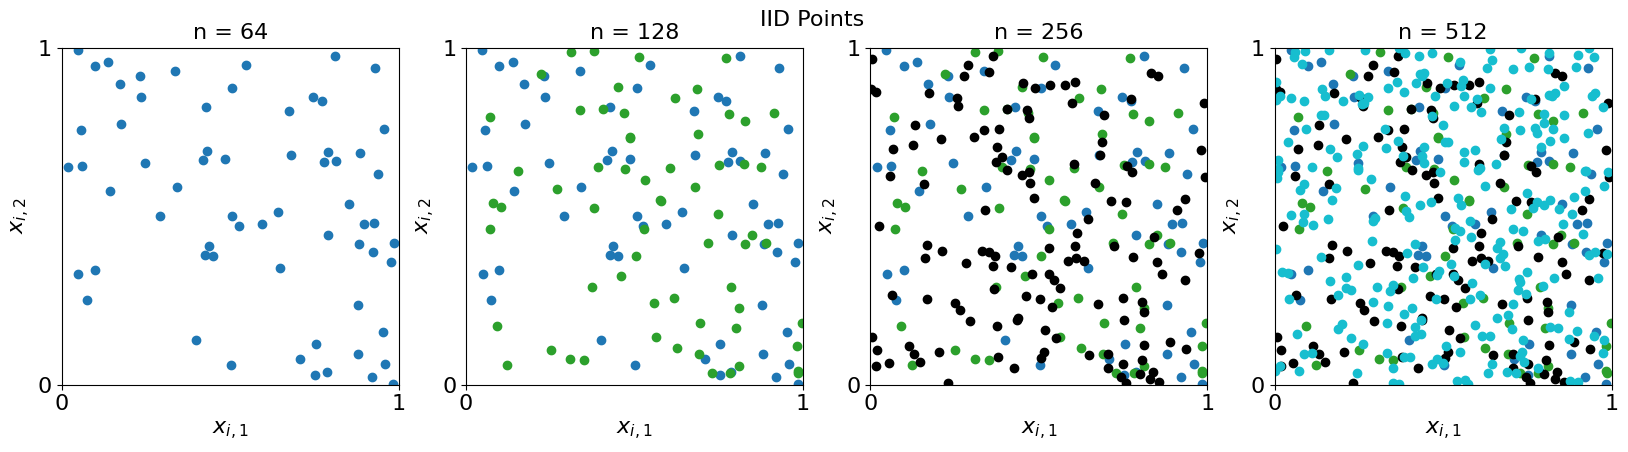

In [14]:
iid = qp.IIDStdUniform(d) #define the generator
xpts = ld.gen_samples(n) #generate points
xpts
fig = plot_successive_points(iid,'IID',first_n=n,n_cols=4)
fig.savefig(figpath+'iidpts.eps',format='eps')

## Beam Example
### Set up the problem using a docker container to solve the ODE

In [18]:
import umbridge #this is the connector
!docker run --name muqbp -d -it -p 4243:4243 linusseelinger/benchmark-muq-beam-propagation:latest #get beam example
d = 3 #dimension of the randomness
lb = 1 #lower bound on randomness
ub = 1.2 #upper bound on randomness
umbridge_config = {"d": d}
model = umbridge.HTTPModel('http://localhost:4243','forward') #this is the original model
outindex = -1 #choose last element of the vector of beam deflections
modeli = deepcopy(model) #and construct a model for just that deflection
modeli.get_output_sizes = lambda *args : [1]
modeli.get_output_sizes()
modeli.__call__ = lambda *args,**kwargs: [[model.__call__(*args,**kwargs)[0][outindex]]]

IOStream.flush timed out
IOStream.flush timed out
docker: Error response from daemon: Conflict. The container name "/muqbp" is already in use by container "568156f8b341d8b69e80ec90a3362c830f037df2cc6b9e68921ed7d09edc4273". You have to remove (or rename) that container to be able to reuse that name.
See 'docker run --help'.


### First we compute the time required to solve for the deflection of the end point using IID and low discrepancy 

In [19]:
iid = qp.Uniform(qp.IIDStdUniform(d),lower_bound=lb,upper_bound=ub)
iid_integ = qp.UMBridgeWrapper(iid,modeli,umbridge_config,parallel=False) #integrand
solution, data = qp.CubMCG(iid_integ, abs_tol = 50).integrate()
print(data)

MeanVarData (AccumulateData Object)
    solution        1040.304
    error_bound     49.990
    n_total         3425
    n               2401
    levels          1
    time_integrate  25.650
CubMCG (StoppingCriterion Object)
    abs_tol         50
    rel_tol         0
    n_init          2^(10)
    n_max           10000000000
    inflate         1.200
    alpha           0.010
UMBridgeWrapper (Integrand Object)
Uniform (TrueMeasure Object)
    lower_bound     1
    upper_bound     1.200
IIDStdUniform (DiscreteDistribution Object)
    d               3
    entropy         218322062669059501227215806001178945435
    spawn_key       ()


In [1]:
ld = qp.Uniform(qp.Lattice(d,seed=7),lower_bound=1,upper_bound=1.2) #lattice points for this problem
ld_integ = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=False) #integrand
tol = 0.02  #smallest tolerance

n_tol = 8
#ii_iid = 2  #make this larger to reduce the time required
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize vector of tolerances
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
#iid_time = [0]*n_tol; iid_n = [0]*n_tol  #IID time and number of function values
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ, abs_tol = tol_vec[ii]).integrate()
  if ii == 0: 
    print(f'\nCantilever Beam\n')
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  #if ii >= ii_iid:
  #  solution, data = qmcpy.CubMCG(iid_keister, abs_tol = tol_vec[ii]).integrate()
  #  iid_time[ii] = data.time_integrate
  #  iid_n[ii] = data.n_total
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,5.5))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='b'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
#ax[0].scatter(tol_vec[ii_iid:n_tol],iid_time[ii_iid:n_tol],color='g'); 
#ax[0].plot(tol_vec[ii_iid:n_tol],[(iid_time[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[0].set_ylim([0.001,1000]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='b'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
#ax[1].scatter(tol_vec[ii_iid:n_tol],iid_n[ii_iid:n_tol],color='g'); 
#ax[1].plot(tol_vec[ii_iid:n_tol],[(iid_n[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[1].set_ylim([1e2,1e8]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([tol,100*tol]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend([r'$\mathcal{O}(\varepsilon^{-1})$',r'$\mathcal{O}(\varepsilon^{-2})$','LD','IID'],frameon=False)
  ax[ii].set_aspect(0.35)

NameError: name 'qp' is not defined

In [8]:
print(data)

LDTransformData (AccumulateData Object)
    solution        [   0.       4.097   15.631 ...  960.504  998.786 1037.103]
    comb_bound_low  [   0.       4.093   15.618 ...  959.479  997.717 1035.992]
    comb_bound_high [   0.       4.1     15.644 ...  961.53   999.854 1038.215]
    comb_flags      [ True  True  True ...  True  True  True]
    n_total         2^(10)
    n               [1024. 1024. 1024. ... 1024. 1024. 1024.]
    time_integrate  6.948
CubQMCLatticeG (StoppingCriterion Object)
    abs_tol         2.560
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
UMBridgeWrapper (Integrand Object)
Uniform (TrueMeasure Object)
    lower_bound     1
    upper_bound     1.200
Lattice (DiscreteDistribution Object)
    d               3
    dvec            [0 1 2]
    randomize       1
    order           natural
    gen_vec         [     1 182667 469891]
    entropy         7
    spawn_key       ()



Cantilever Beam



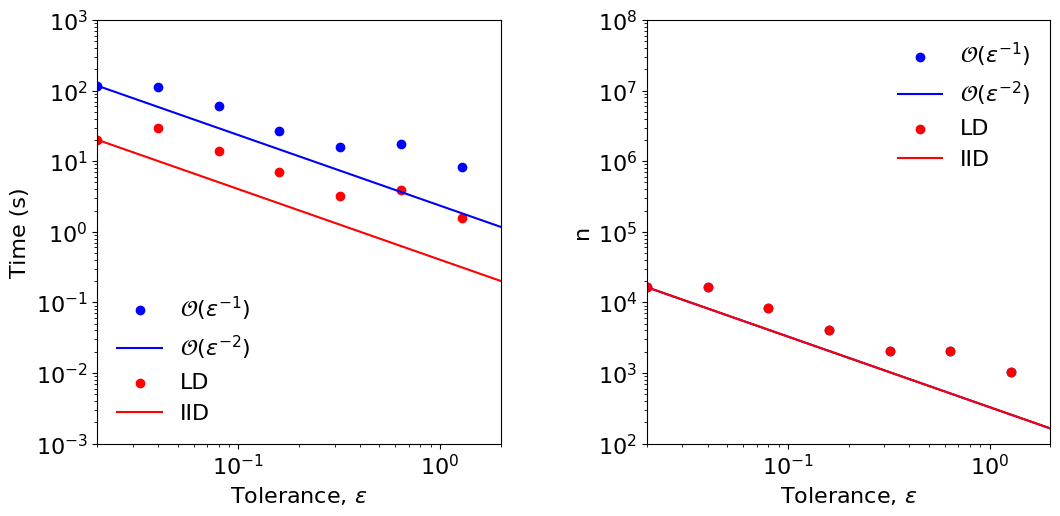

In [9]:
ld_integ_p = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=8) #integrand with parallel processing

ld_p_time = [0]*n_tol; ld_p_n = [0]*n_tol  #low discrepancy time and number of function values with parallel
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ_p, abs_tol = tol_vec[ii]).integrate()
  if ii == 0: 
    print(f'\nCantilever Beam\n')
  ld_p_time[ii] = data.time_integrate
  ld_p_n[ii] = data.n_total
  #if ii >= ii_iid:
  #  solution, data = qmcpy.CubMCG(iid_keister, abs_tol = tol_vec[ii]).integrate()
  #  iid_time[ii] = data.time_integrate
  #  iid_n[ii] = data.n_total
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,5.5))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='b'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
ax[0].scatter(tol_vec[0:n_tol],ld_p_time[0:n_tol],color='r'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_p_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='r')
#ax[0].scatter(tol_vec[ii_iid:n_tol],iid_time[ii_iid:n_tol],color='g'); 
#ax[0].plot(tol_vec[ii_iid:n_tol],[(iid_time[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[0].set_ylim([0.001,1000]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='b'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
ax[1].scatter(tol_vec[0:n_tol],ld_p_n[0:n_tol],color='r'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_p_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='r')
#ax[1].scatter(tol_vec[ii_iid:n_tol],iid_n[ii_iid:n_tol],color='g'); 
#ax[1].plot(tol_vec[ii_iid:n_tol],[(iid_n[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[1].set_ylim([1e2,1e8]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([tol,100*tol]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend([r'$\mathcal{O}(\varepsilon^{-1})$',r'$\mathcal{O}(\varepsilon^{-2})$','LD','IID'],frameon=False)
  ax[ii].set_aspect(0.35)

In [10]:
!docker rm -f muqbp #shut down docker image

IOStream.flush timed out
IOStream.flush timed out
muqbp


## Below is long-running code, that we rarely wish to run

In [11]:
assert False

AssertionError: 

In [ ]:
print('Hi')

In [ ]:
sampler = qp.Uniform(qp.Lattice(d,seed=7),lower_bound=1,upper_bound=1.05) #lattice points for this problem
integrand = qp.UMBridgeWrapper(sampler,model,umbridge_config,parallel=False) #integrand
stop = qp.CubQMCLatticeG(integrand,abs_tol=1) #stoppng criterion
solution,data = stop.integrate()
data

In [ ]:
sampler = qp.Uniform(qp.IIDStdUniform(3,seed=7),lower_bound=1,upper_bound=1.05) #iid points for this problem
integrand = qp.UMBridgeWrapper(sampler,model,umbridge_config,parallel=False) # INTEGRAND
iid_mc_stop = qp.CubMCCLT(integrand,abs_tol=100) # QMC STOPPING CRITERION
#solution,data = iid_mc_stop.integrate()
data